In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import numpy as np
from numpy import median
import re

%matplotlib inline

#### 1. Load the data in the (yellow highlighted) Data Folder in the file auto-mpg.data into a pandas DataFrame.
    
https://archive.ics.uci.edu/ml/datasets/Auto+MPG]
    
#### 2. Review the data and the provided data set description.

We will use this page to check the column names and dataset description.
    
https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.names

#### 3. Use the attribute information provided in auto-mpg.names to name your pandas DataFrame columns.

This is not a CSV file, we will use pandas.read_table() function to get the data into a table, there is no header (header-None) and rename the table with the columns in the auto-mpg.names page.

#### 4. Some of the horsepower data is marked as missing with a ‘?’. You need to replace this ‘?’ with a pandas-appropriate missing value, then convert the column to numeric.

Notice that there are '?' in the horsepower column, we will replace then with na_values=["?"]

In [2]:
df = pd.read_table('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data', header=None, sep='\s+', names=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name'], na_values=["?"])

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [4]:
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger
397,31.0,4,119.0,82.0,2720.0,19.4,82,1,chevy s-10


In [5]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model_year        int64
origin            int64
car_name         object
dtype: object

#### There are 6 nulls or missing values in the horsepower column just as the document stated

In [6]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

#### We will replace the missing values (or NaN) with '0'

In [7]:
df1 = df.fillna(0)

In [8]:
df1.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

#### A new dataframe, df1, will be used from this point forward.

In [9]:
df1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


#### 5. The origin column values are 1, 2, and 3. Convert these values respectively to ‘USA’, ‘Asia’, and ‘Europe’

As per instructions we will replace 1 = USA, 2 = Asia, and 3 = Europe

But first we need to convert the the data type in the origin column from int64 to a string object.

In [10]:
df1['origin'] = df1['origin'].astype(str)

In [11]:
df1.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model_year        int64
origin           object
car_name         object
dtype: object

#### Now we can replace the 1 , 2, 3 to the country, USA, Asia, Europe respectively.

In [12]:
df1['origin'] = df1['origin'].replace(['1', '2', '3'], ['USA', 'Asia', 'Europe'])

In [13]:
df1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA,ford torino


In [14]:
df1.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
393,27.0,4,140.0,86.0,2790.0,15.6,82,USA,ford mustang gl
394,44.0,4,97.0,52.0,2130.0,24.6,82,Asia,vw pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82,USA,dodge rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82,USA,ford ranger
397,31.0,4,119.0,82.0,2720.0,19.4,82,USA,chevy s-10


### 6. Create a bar chart that shows the distribution for cylinders.

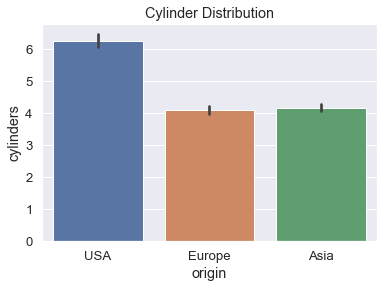

In [15]:
sns.set(font_scale=1.2)
cy_dist = sns.barplot(x='origin', y='cylinders', data=df1).set_title('Cylinder Distribution')

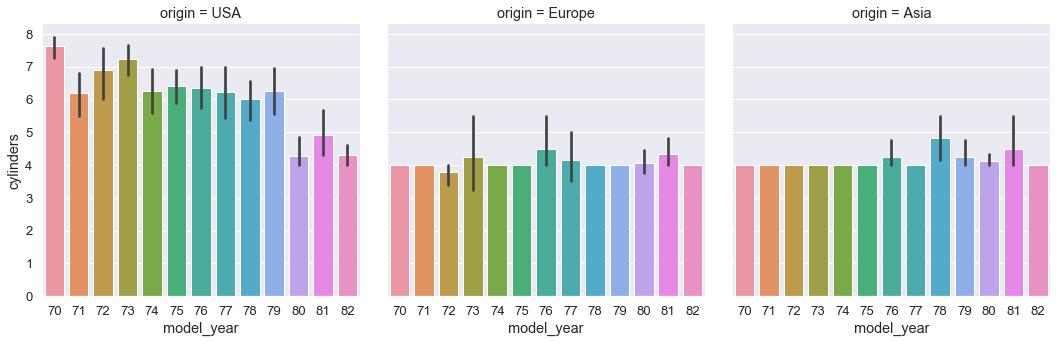

In [16]:
cy_dist2 = sns.catplot(y='cylinders', x='model_year', col='origin', data=df1, kind='bar')

### 7. Create a scatterplot that shows the relationship between horsepower and weight.

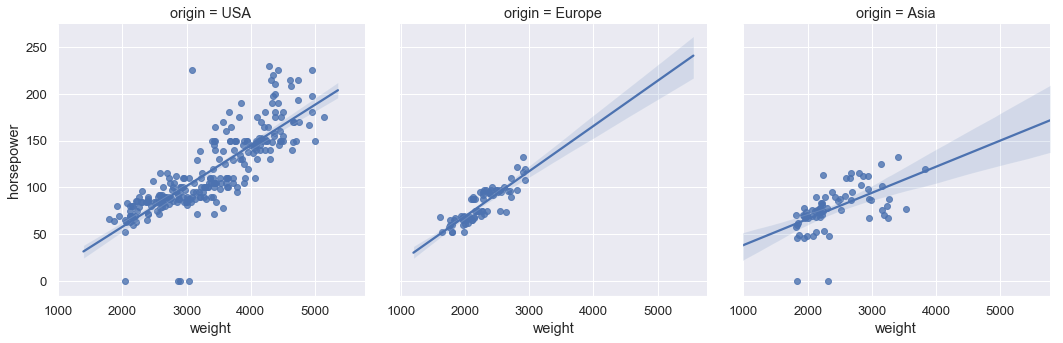

In [17]:
sns.set(font_scale=1.2)
horsepower_weight = sns.lmplot(x='weight', y='horsepower', col='origin', data=df1)

### 8. Ask, then answer (using matplotlib and seaborn graphics capabilities) an interesting question about the distribution of one of the variables, or the relationship between two (or more!) of the variables in the “Auto MPG” dataset.

#### What is the correlaton between mpg, horsepower, and weight?

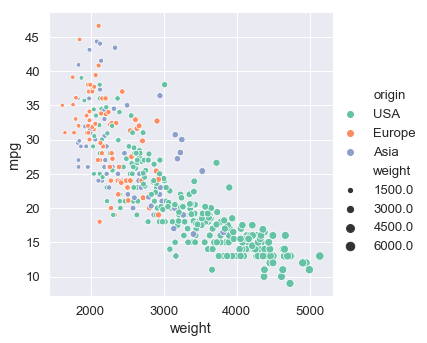

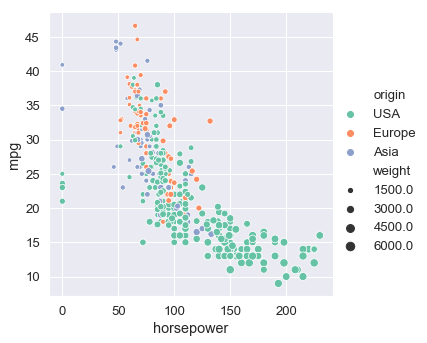

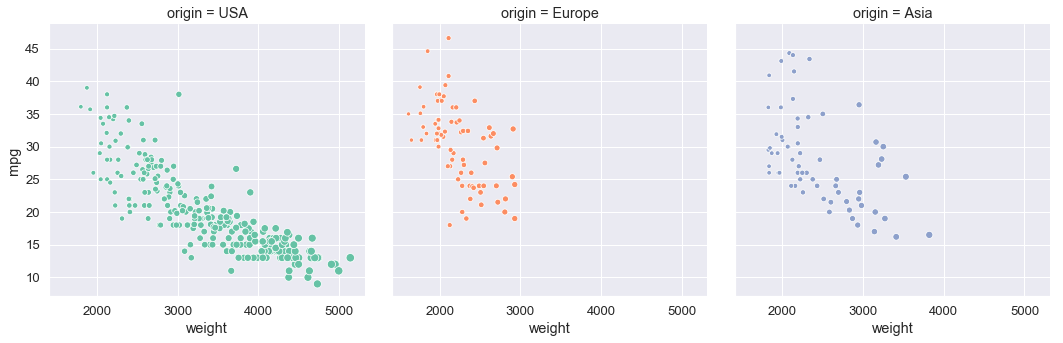

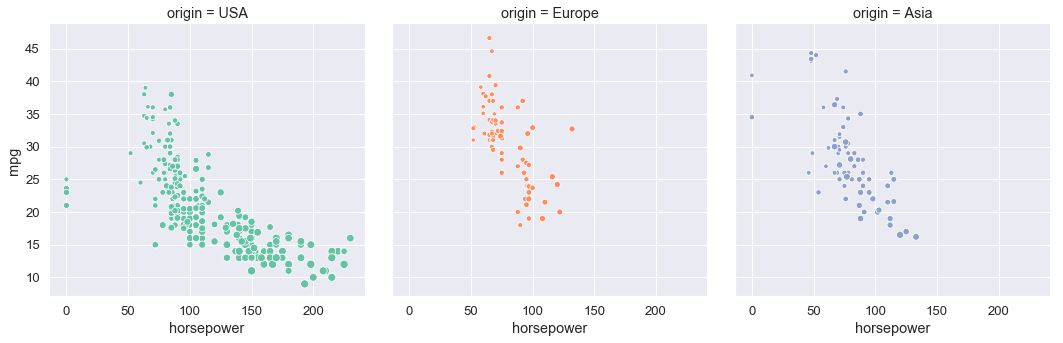

In [18]:
mpg_year = sns.relplot(x="weight", y="mpg", hue="origin", size='weight', data=df1, palette="Set2", ci=None)
mpg_hp = sns.relplot(x="horsepower", y="mpg", hue="origin", size='weight', data=df1, palette="Set2", ci=None)
mpgyear = sns.relplot(x="weight", y="mpg", col='origin', hue="origin", size='weight', data=df1, palette="Set2", legend=False, ci=None)
mpgyear = sns.relplot(x="horsepower", y="mpg", col='origin', hue="origin", size='weight', data=df1, palette="Set2", legend=False, ci=None)

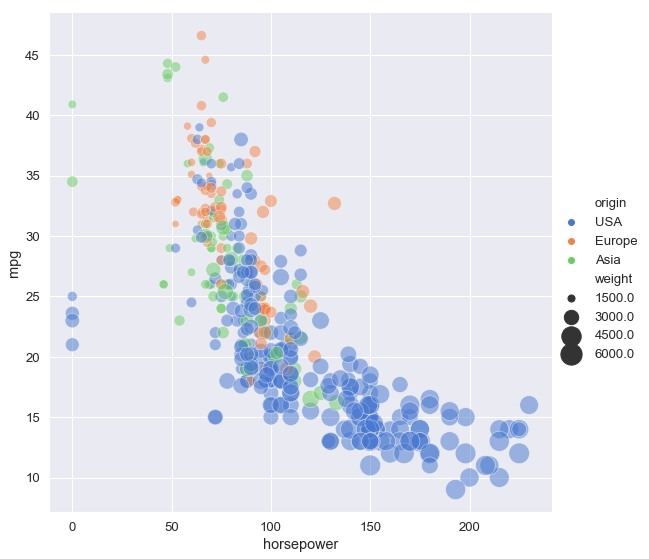

In [19]:
sns.relplot(x="horsepower", y="mpg", hue="origin", size="weight",
            sizes=(50, 450), alpha=.5, palette="muted",
            height=8, data=df1)

Here is a distribution of a car's weight, horsepower, and MPG.
As you can see European cars boast the most efficient milage per gallon, while being in the lower weight classes, however, they are lower in horsepower. American cars on the other hand boast the highest horsepower but also being the heaviest, in fact, the heaviest cars are all American. Asian cars are in the middle in terms of horsepower and MPG efficiency. 